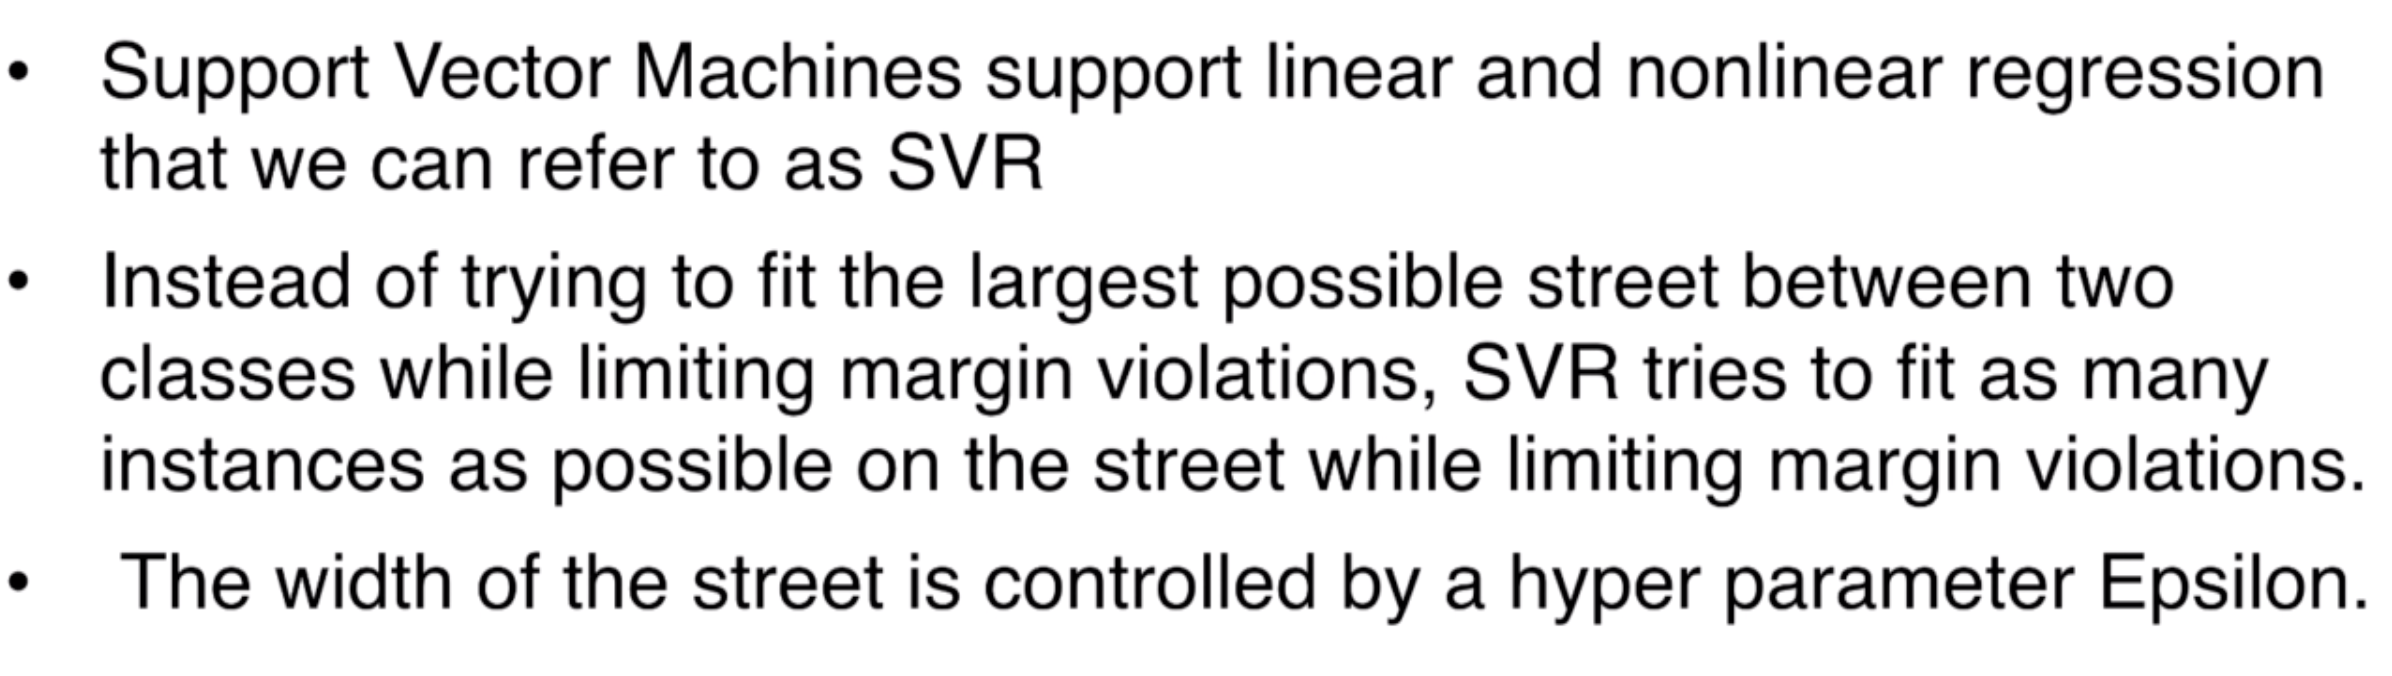

## Linear Regression vs SVR
- Linear Regression : Error을 최소화 하는게 Objective
- SVR : Boundary 안에 있는 error에 대해서만 fit 하는게 Objective

# Terms to Cover
1. Hyperplane - SVM에서 두개의 class를 나누는 기준 선이었다면, SVR에서는 타겟 Value에 대한 예측을 도와줄 라인
2. Boundary - Hyperplane을 기준으로 e(Epsilon) 만큼의 거리로 +, - 방향으로 떨어져있는 두 선(Margin). Support Vector들은 이 바운더리에 걸치거나, 바깥에 위치해 있다.
3. Support Vector - Boundary와 가장 가까운 포인트들

# 언제 SVR을 써야 할까?
- 데이터가 Linear Regression 모델로 fit이 잘 되지 않을때 (Not linearly distributed)
- 굉장히 추상적인 모델이기도 하고 Regression에서는 Support Vector 자체가 잘 쓰이지 않으므로 느낌적으로만 보고 자세한 이해는 분류모델의 SVM에서 하는 방향

#  SVR's Best fitting Line == 가장 많은 포인트를 Boundary 안에서 커버할수 있는 Hyperplane 라인

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("Machine Learning A-Z Template Folder/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv")
dataset

In [ ]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [ ]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X,y)

In [ ]:
y_pred = regressor.predict([[6.5]])

In [ ]:
y_pred

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.show()

##### 굉장히 부정확한 모델이 나왔다. 뭐가 문제일까요?

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(np.expand_dims(y,axis=1)) #1차원 어레이를 2차원으로 늘려주는 것

In [ ]:
y

In [ ]:
y = np.squeeze(y, axis=1) #다시 1차원으로 차원축소

In [ ]:
y

In [ ]:
regressor_2 = SVR()
regressor_2.fit(X,y)

In [ ]:
regressor_2.predict([[6.5]]) 

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor_2.predict(X),color='blue')
plt.show()

##### 유독 마지막 observation에 대해서는 굉장히 fit하지 못하는 모습을 발견할수 있다.
- 마지막 포지션의 경우 outlier라고 계산하여 그 외의 포인트들에 대해 fit 하게 만들었기 때문. (out of boundary)

###### Feature Scaling이 적용된 값들에 대해 실제 값으로 되돌려 봅시다.

In [ ]:
sc_y.inverse_transform(regressor_2.predict(sc_X.transform([[6.5]])))